## Group Project Prososal (Group 11) 

## 1. Title : Credit Card Fraud Data Analysis Report


## 2. Introduction

**1) Background Information** 

As digital payments boomed in recent years with the rapid development of the Internet, people enjoy the fast and convenient transaction service but also face an increasing number of cyber criminals alongside. The Data Breach Index announced that over five million records are being stolen on a daily basis, which indicates that fraud is very common in our daily life. However, detection of fraud is challenging since trillions of card transactions happen per day. 


**2) Research Question**

Based on the analysis, can we predict fraudulent transaction using **<font color=red> distance from home and ratio to median purchase price</font>** variables to prevent future crime?

**3) Dataset description**

We will be using a dataset called Credit Card Fraud made by Dhanush Narayanan from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud. The dataset is in a “Comma Seperated Value” (csv) file format and contains eight columns, which are: 
- **distance_from_home** = the distance from home where the transaction happened
- **distance_from_last_transaction** = the distance from last transaction happened.
- **ratio_to_median_purchase_price**  =  Ratio of purchased price transaction to median purchase price.
- **repeat_retailer** = whether the transaction happened from same retailer or not
- **used_chip** = whether the transaction is through chip (credit card) or not
- **used_pin_number** = whether the transaction happened by using PIN number or not
- **online_order** = whether the transaction is an online order or not
- **fraud** = whether the transaction is fraudulent or not

Our target variable, which is the variable that we are predicting, is fraud and the predictors that we will be using are distance_from_home and ratio_to_median_purchase_price.

## 3. Preliminary exploratory data analysis

In this preliminary exploratory data analysis, we would demonstrate that our dataset can be read into R using the read_csv function as our dataset is in a CSV file format. Then, we would clean and wrangle our dataset into a tidy format and kept only the target variable and the predictors, so that we can easily perform the procedure to create a KNN classification model and generate visualization plots. Next, we would split our dataset into training and testing set, summarize the training data and finally create a visualization in the form of a scatter plot to show the realtionship between the predictors and the target variable.

First of all, we would load the packages that are required to perform the analysis of our data set.

In [2]:
#Load packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
install.packages("GGally")
library(GGally)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflict

After loading the required packages, we will read our dataset into R using read_csv and assigned it to an object called read_data.

In [3]:
#Read the dataset into R
read_data <- read_csv("data/card_transdata.csv")

#Show the first ten rows of the dataset
head(read_data, 10)

Parsed with column specification:
cols(
  distance_from_home = col_double(),
  distance_from_last_transaction = col_double(),
  ratio_to_median_purchase_price = col_double(),
  repeat_retailer = col_double(),
  used_chip = col_double(),
  used_pin_number = col_double(),
  online_order = col_double(),
  fraud = col_double()
)



distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57.8778566,0.3111400,1.94593998,1,1,0,0,0
10.8299427,0.1755915,1.29421881,1,0,0,0,0
5.0910795,0.8051526,0.42771456,1,0,0,1,0
2.2475643,5.6000435,0.36266258,1,1,0,1,0
44.1909360,0.5664863,2.22276730,1,1,0,1,0
5.5864077,13.2610733,0.06476847,1,0,0,0,0
3.7240191,0.9568379,0.27846494,1,0,0,1,0
4.8482466,0.3207354,1.27304952,1,0,1,0,0
0.8766323,2.5036089,1.51699932,0,0,0,0,0


As seen from the loaded dataset, all columns contain the data type "double" (dbl), meaning they contain numerical values. However, columns repeat_retailer, used_chip, used_pin_number, online_order, and fraud seem to only contain binary values "0" and "1". We can change these values into a logical statement such as TRUE and FALSE, where TRUE corresponds to the value "1" and FALSE corresponds to the value "0". Then, we can change the data type of these columns into categorical data type (fct) and assign our dataset into an object called data.

In [6]:
data <- read_data %>%
        #Converts columns from numerical to logical
            mutate(repeat_retailer = as.logical(repeat_retailer)) %>%
            mutate(used_chip = as.logical(used_chip)) %>%
            mutate(used_pin_number = as.logical(used_pin_number)) %>%
            mutate(online_order = as.logical(online_order)) %>%
            mutate(fraud = as.logical(fraud))%>%
        #Converts data types into factor
            mutate(repeat_retailer = as_factor(repeat_retailer)) %>%
            mutate(used_chip = as_factor(used_chip)) %>%
            mutate(used_pin_number = as_factor(used_pin_number)) %>%
            mutate(fraud = as_factor(fraud)) 

#Show the first ten rows of the dataset
head(data, 10)

distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<lgl>,<fct>
57.8778566,0.3111400,1.94593998,TRUE,TRUE,FALSE,FALSE,FALSE
10.8299427,0.1755915,1.29421881,TRUE,FALSE,FALSE,FALSE,FALSE
5.0910795,0.8051526,0.42771456,TRUE,FALSE,FALSE,TRUE,FALSE
2.2475643,5.6000435,0.36266258,TRUE,TRUE,FALSE,TRUE,FALSE
44.1909360,0.5664863,2.22276730,TRUE,TRUE,FALSE,TRUE,FALSE
5.5864077,13.2610733,0.06476847,TRUE,FALSE,FALSE,FALSE,FALSE
3.7240191,0.9568379,0.27846494,TRUE,FALSE,FALSE,TRUE,FALSE
4.8482466,0.3207354,1.27304952,TRUE,FALSE,TRUE,FALSE,FALSE
0.8766323,2.5036089,1.51699932,FALSE,FALSE,FALSE,FALSE,FALSE


To further clean our dataset, we will only be selecting for the columns that will function as our target variable (fraud) and predictors (distance_from_home and ratio_to_median_purchase_price) in our classification model. We will assign our tidy dataset into an object called card_data.

In [7]:
#Selecting for the columns that will become the target variable and predictors
card_data <- select(data, distance_from_home, ratio_to_median_purchase_price, fraud )

#Show the first ten rows of the dataset
head(card_data, 10)

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
57.8778566,1.94593998,FALSE
10.8299427,1.29421881,FALSE
5.0910795,0.42771456,FALSE
2.2475643,0.36266258,FALSE
44.1909360,2.22276730,FALSE
5.5864077,0.06476847,FALSE
3.7240191,0.27846494,FALSE
4.8482466,1.27304952,FALSE
0.8766323,1.51699932,FALSE


In [8]:
#Setting the seed
set.seed(1)

#Splitting the dataset stored in card_data into training dataset and testing dataset
card_split <- initial_split(card_data, prop = 0.75, strata = fraud)  
card_train <- training(card_split) 
card_test <- testing(card_split)

#Show the first ten rows of the training dataset
head(card_train, 10)

distance_from_home,ratio_to_median_purchase_price,fraud
<dbl>,<dbl>,<fct>
5.091079,0.42771456,FALSE
2.247564,0.36266258,FALSE
5.586408,0.06476847,FALSE
4.848247,1.27304952,FALSE
8.839047,2.36168255,FALSE
13.592368,1.37032986,FALSE
765.282559,0.55124475,FALSE
13.955972,2.79890112,FALSE
179.665148,0.53564048,FALSE


Warning message:
“Removed 135 rows containing missing values (geom_point).”


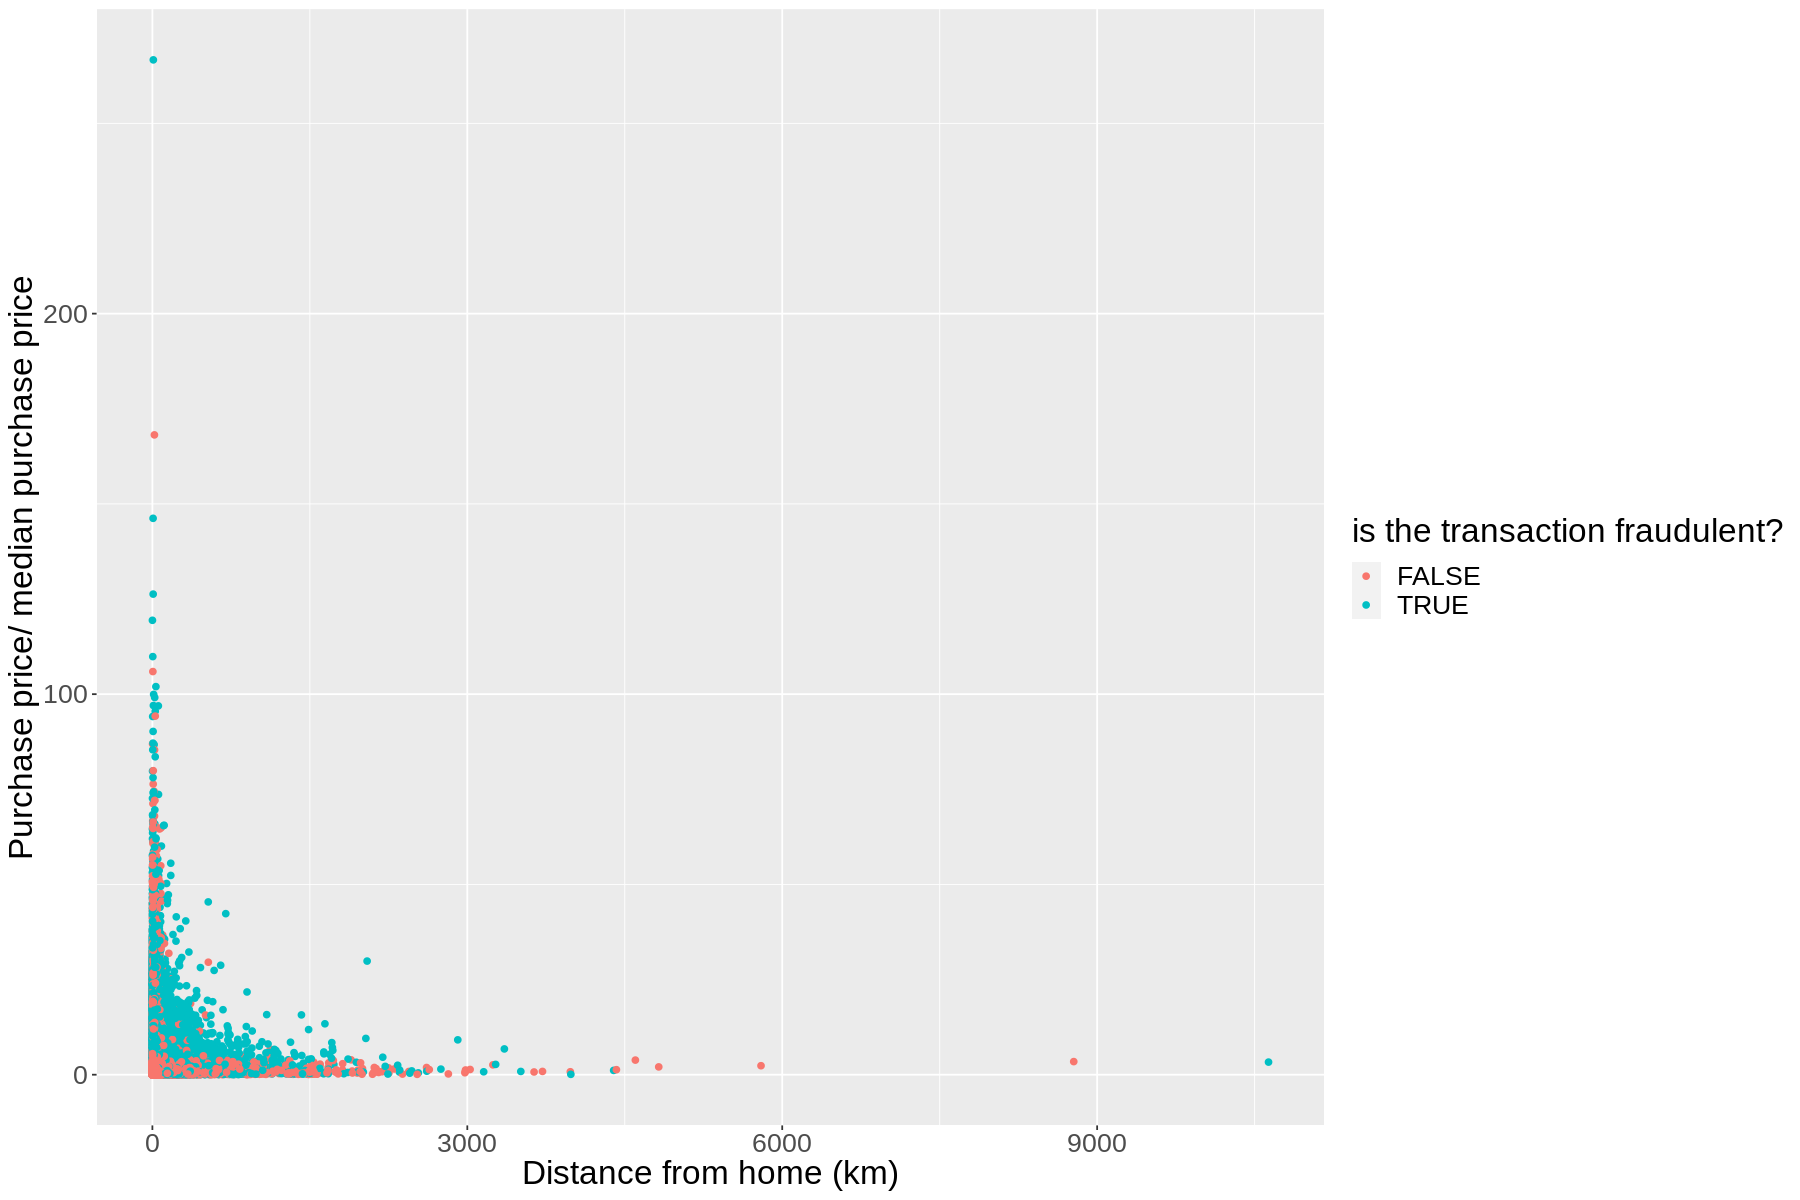

Warning message:
“Removed 356 rows containing missing values (geom_point).”


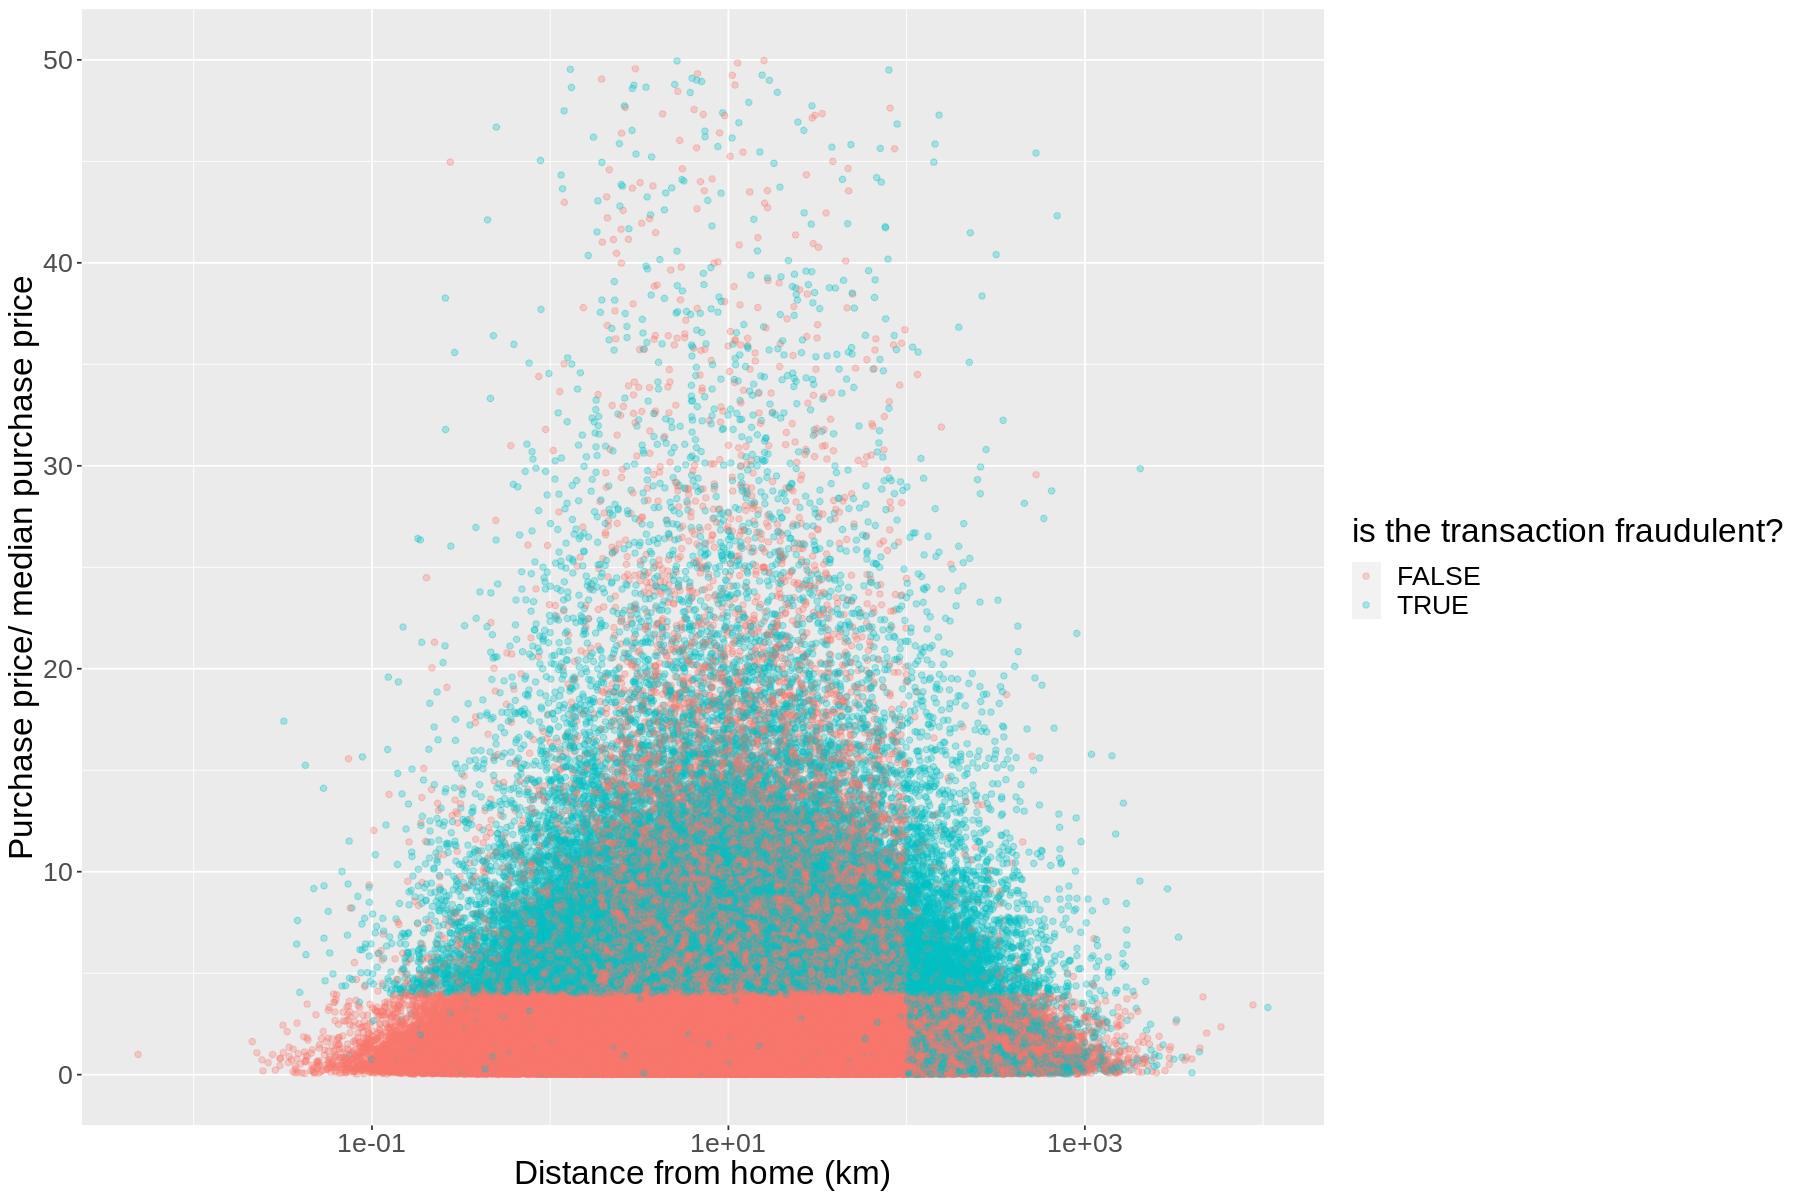

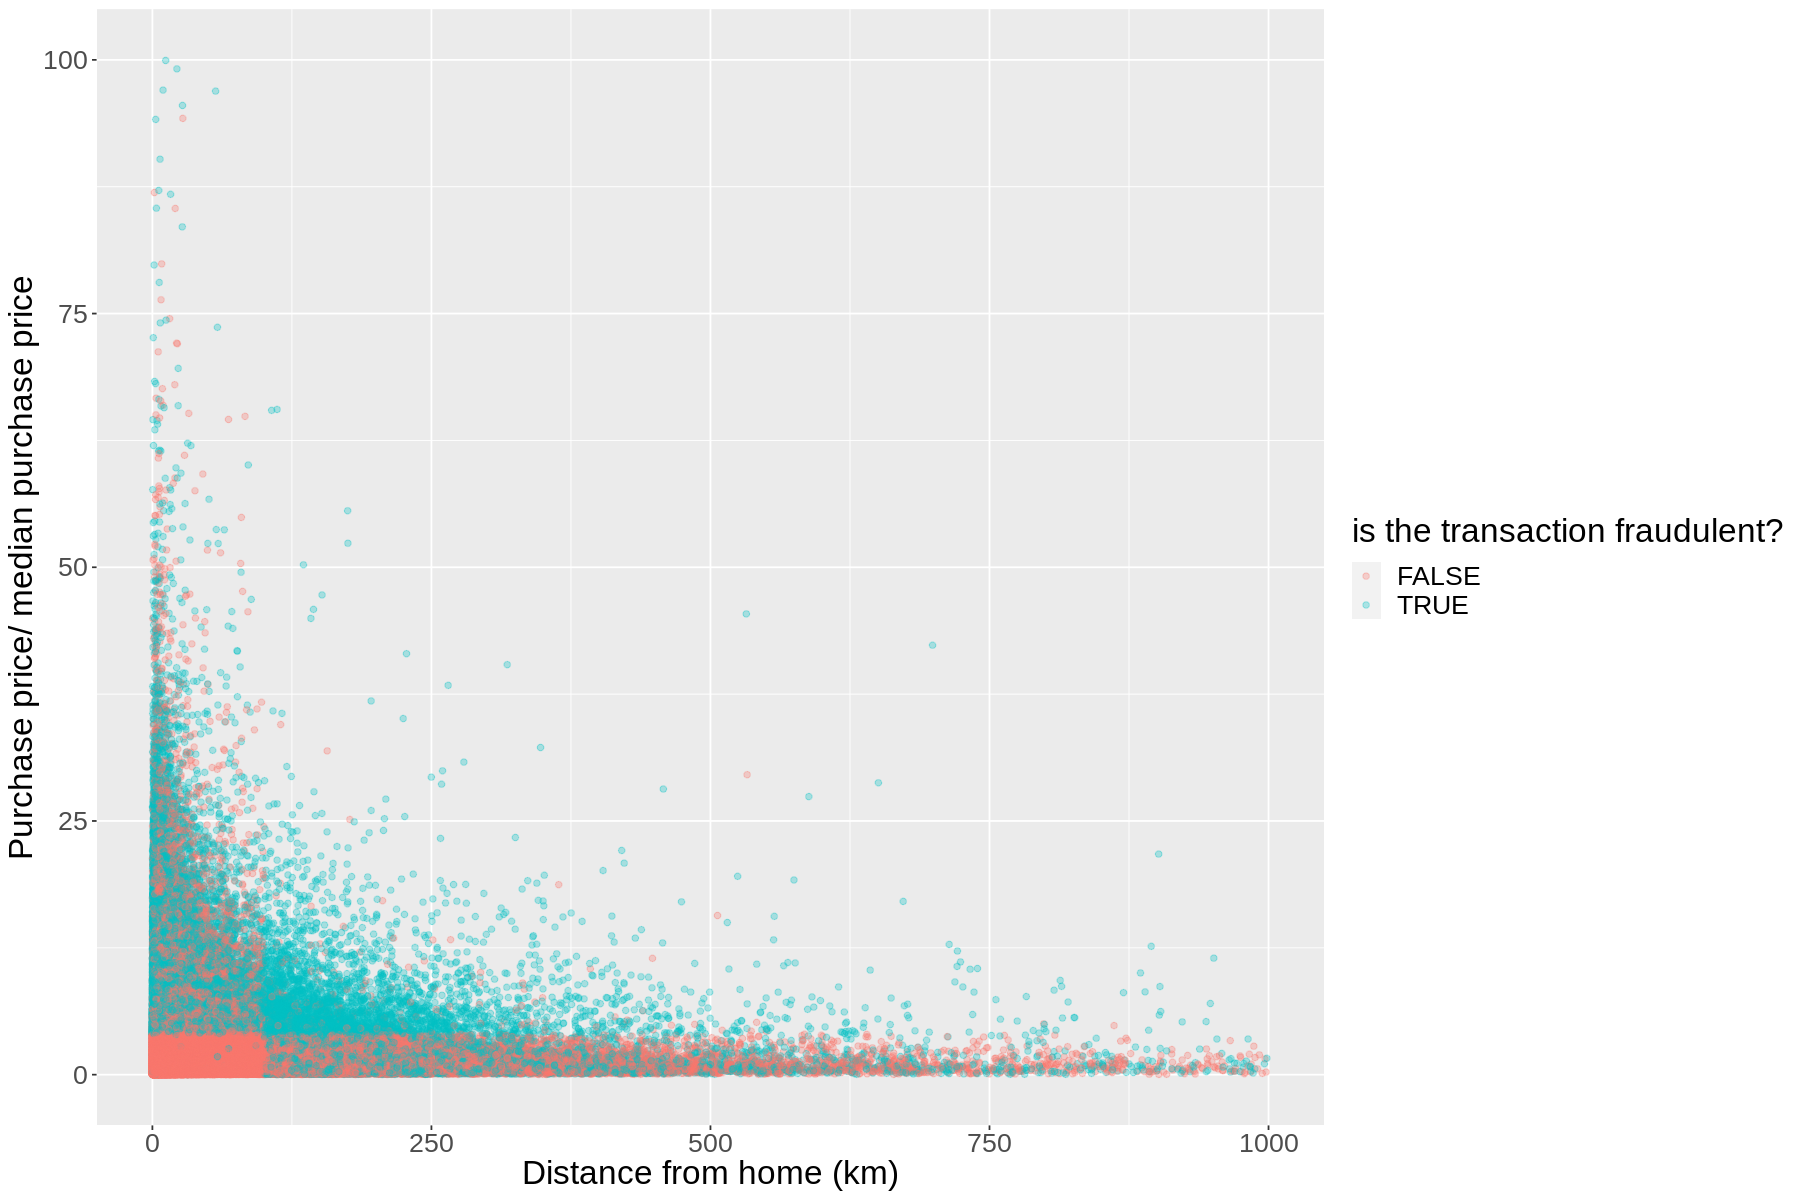

In [6]:
options(repr.plot.width = 15, repr.plot.height = 10) 

card_plot_unscaled <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud)) +
            geom_point() +
            labs( x = "Distance from home (km)" , y = "Purchase price/ median purchase price" , color = "is the transaction fraudulent?") +
            theme(text = element_text(size = 20))

card_plot_unscaled

card_plot <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud)) +
            geom_point(alpha = 0.3) +
            scale_y_continuous(limits = c(0, 50))+
            scale_x_continuous(trans = 'log10')+
            labs( x = "Distance from home (km)" , y = "Purchase price/ median purchase price" , color = "is the transaction fraudulent?") +
            theme(text = element_text(size = 20))

card_plot



card_plot2 <- ggplot(card_train, aes(x = distance_from_home , y =  ratio_to_median_purchase_price, color = fraud)) +
            geom_point(alpha = 0.3) +
           scale_y_continuous(limits = c(0, 100))+
             scale_x_continuous(limits = c(0, 1000))+
            labs( x = "Distance from home (km)" , y = "Purchase price/ median purchase price" , color = "is the transaction fraudulent?" ) +
            theme(text = element_text(size = 20))

card_plot2


## 4. Methods:

In [ ]:
#Find the correlation between fraud and other variables
original_data <- read.csv("data/card_transdata.csv")
cor(original_data)


From the last row of the table, we observe that the distance from home, the ratio to median purchase price and the online order are the top three variables that are 
correlated with the fraud. 

However, since the online order is categorical data, we would not use the online order to make our prediction. 

Thus, the predictor variabels we will use are the ratio to median purchase price and the distance from home. The response variable is a categorical variable stating that 
whether the transaction is fraudulent or not.

One possible way to visualize the results is to use table visualization. It would take the number of distance and ratio and make predictions of the fraud.  


## 5. Expected outcomes and significance:


**1) What do you expect to find?**

We expect to find that the farther the transaction took place the more likely that the transaction is fradulent. We also expect that the higer the price the higher the chances of fraud. 

**2)What impact could such findings have?**

It could dictae and influence consumer decisions when purchasing items from vendors both online and offline and help algorithm and moderators of online and offline shopping platforms to identify potential fraudulent vendors.

**3) What future questions could this lead to?**

The rationale behind why it is more likely that a vendor to be fradulent on higher price items when further away from the customers' home.

Whether is it because of the fact that more customers are more likely to purcahse from fraudulents vendor that sell expensive merchandise or is it because that vendours are less likely to be caught when they are further away from their victim's place of residence that causes vendors that are further and more expensive to be more fraudulent.

